# Elligibilité Crédit Bancaire

## 1. Exploration des données

### Importations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Chargement du dataset

In [3019]:
df_loan = pd.read_csv("loan-data-673b233f1c1cb921157550.csv", sep=",")

### Premières visualisations

In [3020]:
print("Premières lignes du dataset :")
display(df_loan.head(10))
print("Dernières lignes du dataset :")
display(df_loan.tail(10))
print("\nForme du dataset :")
display(df_loan.shape)
print("\nInformations sur le dataset :")
display(df_loan.info())
print("\nDescription du dataset (variables quantitatives) :")
display(df_loan.describe())
print("\nDescription du dataset (variables qualitatives) :")
display(df_loan.describe(include=['O']))
print("\nDistribution des classes de Loan_Status :")
display(df_loan['Loan_Status'].value_counts())
print("\nPrésence de NaN dans chaque variable :")
display(df_loan.isna().any())

Premières lignes du dataset :


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

Dernières lignes du dataset :


Loan_ID  Gender Married Dependents     Education Self_Employed  \
971  LP002952    Male      No          0      Graduate            No   
972  LP002954    Male     Yes          2  Not Graduate            No   
973  LP002962    Male      No          0      Graduate            No   
974  LP002965  Female     Yes          0      Graduate            No   
975  LP002969    Male     Yes          1      Graduate            No   
976  LP002971    Male     Yes         3+  Not Graduate           Yes   
977  LP002975    Male     Yes          0      Graduate            No   
978  LP002980    Male      No          0      Graduate            No   
979  LP002986    Male     Yes          0      Graduate            No   
980  LP002989    Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
971             2500                0.0        60.0             360.0   
972             3132                0.0        76.0             360.0   
973             4000             2667.0       152.0             360.0   
974             8550             4255.0        96.0             360.0   
975             2269             2167.0        99.0             360.0   
976             4009             1777.0       113.0             360.0   
977             4158              709.0       115.0             360.0   
978             3250             1993.0       126.0             360.0   
979             5000             2393.0       158.0             360.0   
980             9200                0.0        98.0             180.0   

     Credit_History Property_Area Loan_Status  
971             1.0         Urban         NaN  
972             NaN         Rural         NaN  
973             1.0     Semiurban         NaN  
974             NaN         Urban         NaN  
975             1.0     Semiurban         NaN  
976             1.0         Urban         NaN  
977             1.0         Urban         NaN  
978             NaN     Semiurban         NaN  
979             1.0         Rural         NaN  
980             1.0         Rural         NaN


Forme du dataset :


(981, 13)


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


None


Description du dataset (variables quantitatives) :


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000


Description du dataset (variables qualitatives) :


Loan_ID Gender Married Dependents Education Self_Employed  \
count        981    957     978        956       981           926   
unique       981      2       2          4         2             2   
top     LP002989   Male     Yes          0  Graduate            No   
freq           1    775     631        545       763           807   

       Property_Area Loan_Status  
count            981         614  
unique             3           2  
top        Semiurban           Y  
freq             349         422


Distribution des classes de Loan_Status :


Loan_Status
Y    422
N    192
Name: count, dtype: int64


Présence de NaN dans chaque variable :


Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status           True
dtype: bool

Caractéristiques du dataset :
- Lignes : 981, Colonnes : 13
- Types : float (4), int (1) et object (8)
- Usage mémoire : 99.8+ KB
- Variable cible : Loan_Status
- Beaucoup de NaN dans la variable Loan_Status
- Répartition inégale dans les classes de Loan_Status : Y = 422, N = 192

### Corrélations entre les caractéristiques

<Axes: >

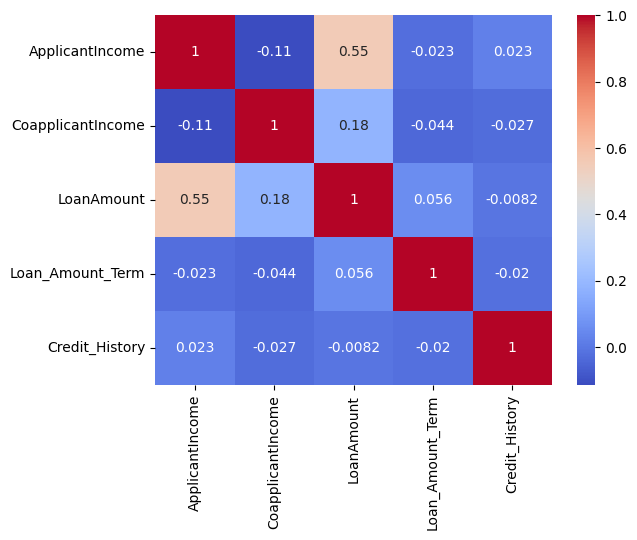

In [3021]:
df_corr = df_loan.select_dtypes(include=['number']).corr()
sns.heatmap(df_corr, annot=True, cmap="coolwarm")

Caractéristiques ayant une forte corrélation :
- ApplicantIncome / LoanAmount
- CoapplicantIncome / LoanAmount
- ApplicantIncome / CoapplicantIncome

C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\64455848.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_encoded['Loan_Status'][i] = 1
C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\64455848.py:5: SettingWithCopyWarning: 
A value

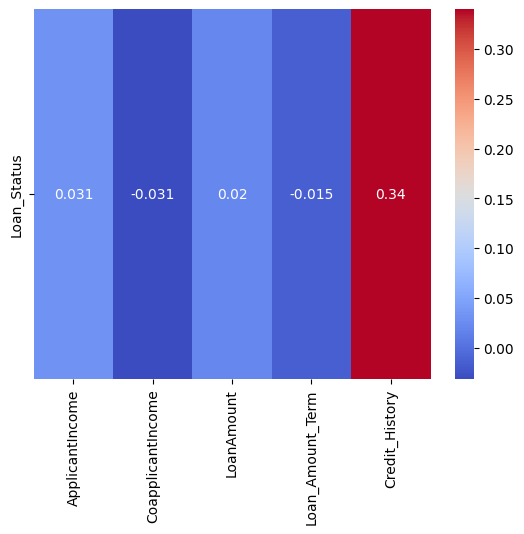

In [3022]:
df_encoded = df_loan.copy()

for i in range(len(df_encoded['Loan_Status'])):
    if df_encoded['Loan_Status'][i] == 'Y':
        df_encoded['Loan_Status'][i] = 1
    else:
        df_encoded['Loan_Status'][i] = 0

df_corr = df_encoded[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']]
correlations = df_corr.corr()['Loan_Status'].drop('Loan_Status')
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm")
plt.show()

On peut remarquer ici que la variable la plus corrélée à la cible est Credit_History.

### Distributions des caractéristiques

In [3023]:
def distrib_hisplot(df, rows_nb):
    fig, axs = plt.subplots(nrows=rows_nb, ncols=3, figsize=(15, 10))

    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.histplot(df[column], kde=True, ax=axs[row, col])
        axs[row, col].set_title(f"Distribution des valeurs de {column}")

    plt.tight_layout()
    plt.show()

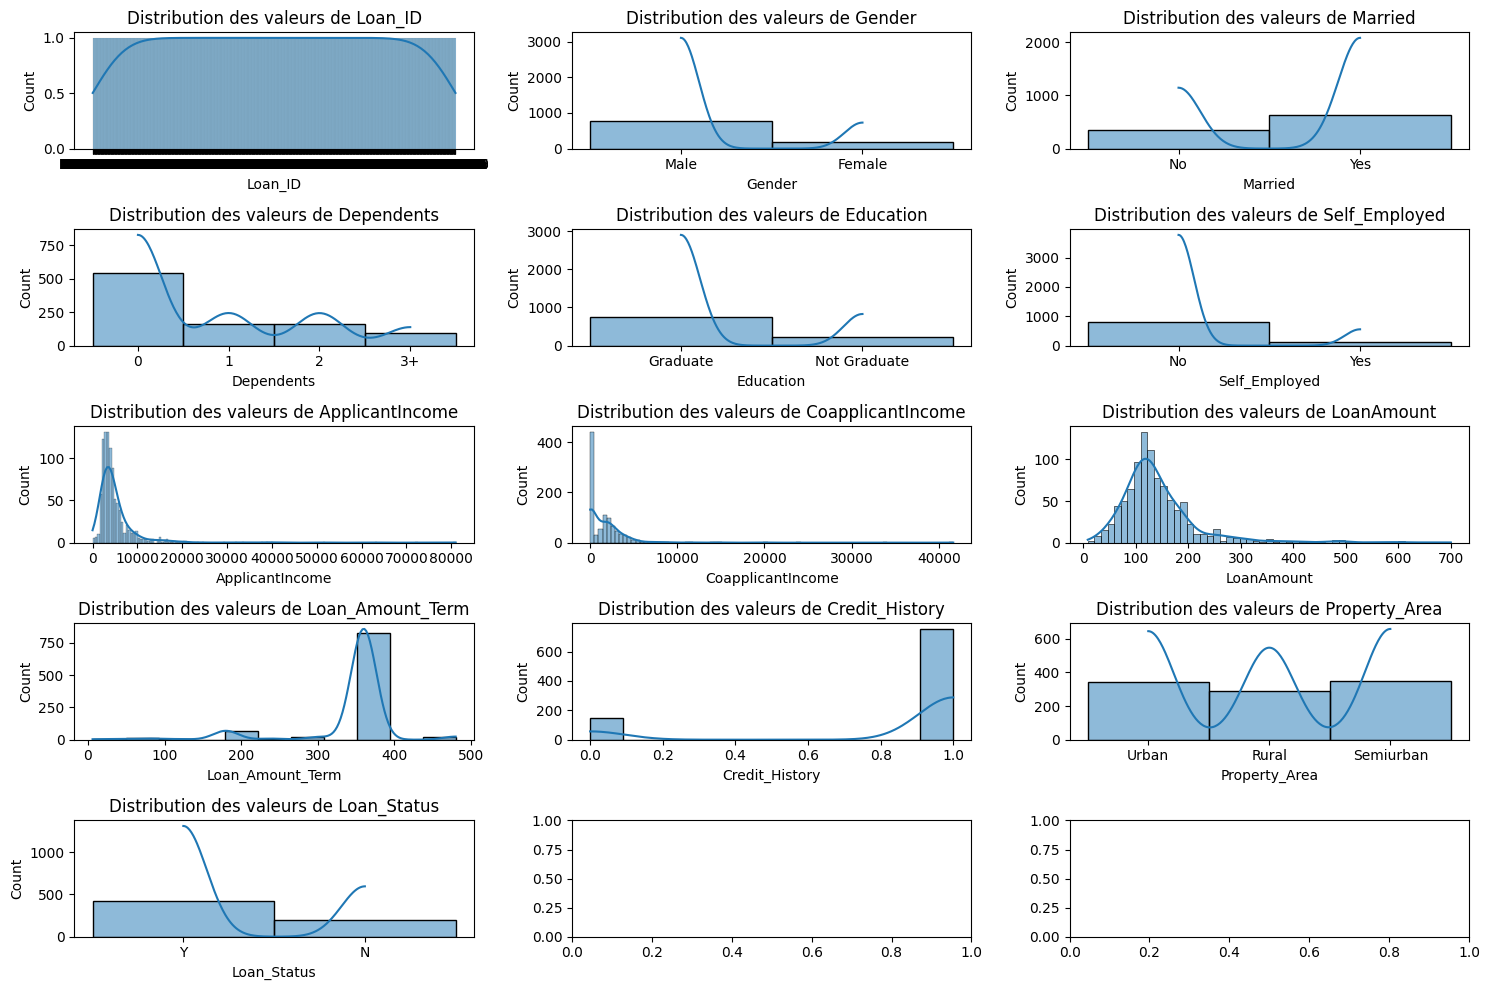

In [3024]:
distrib_hisplot(df_loan, 5)

In [3025]:
display(df_loan['Loan_Status'])

0        Y
1        N
2        Y
3        Y
4        Y
      ... 
976    NaN
977    NaN
978    NaN
979    NaN
980    NaN
Name: Loan_Status, Length: 981, dtype: object

Notes :
- Il semble y avoir beacoup d'outliers dans les variables ApplicantIncome et CoapplicantIncome.
- La distribution de LoanAmount est proportionnellement assez similaire dans les deux classes.
- La distribution de CoapplicantIncome est proportionnellement assez similaire dans les deux classes.
- C'est dans la varibale ApplicantIncome que la distribution est assez différente entre les deux classes. Donc, entre cette information et celles de la heatmap, on peut en conclure que c'est cette variable qui semble avoir le plus de liens avec Loan_Status.
- La distribution de Loan_Amount_Term est proportionnellement assez similaire dans les deux classes.
- La distribution de Credit_History est différente dans les deux classes : elle est très majoritairement sur 1.0 pour la classe Y et équilibrée sur la classe N.

### Identification des outliers

In [3026]:
def distrib_boxplot(df, rows_nb):
    fig, axs = plt.subplots(nrows=rows_nb, ncols=3, figsize=(15, 10))

    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.boxplot(df[column], ax=axs[row, col])
        axs[row, col].set_title(f"Distribution des valeurs de {column}")

    plt.tight_layout()
    plt.show()

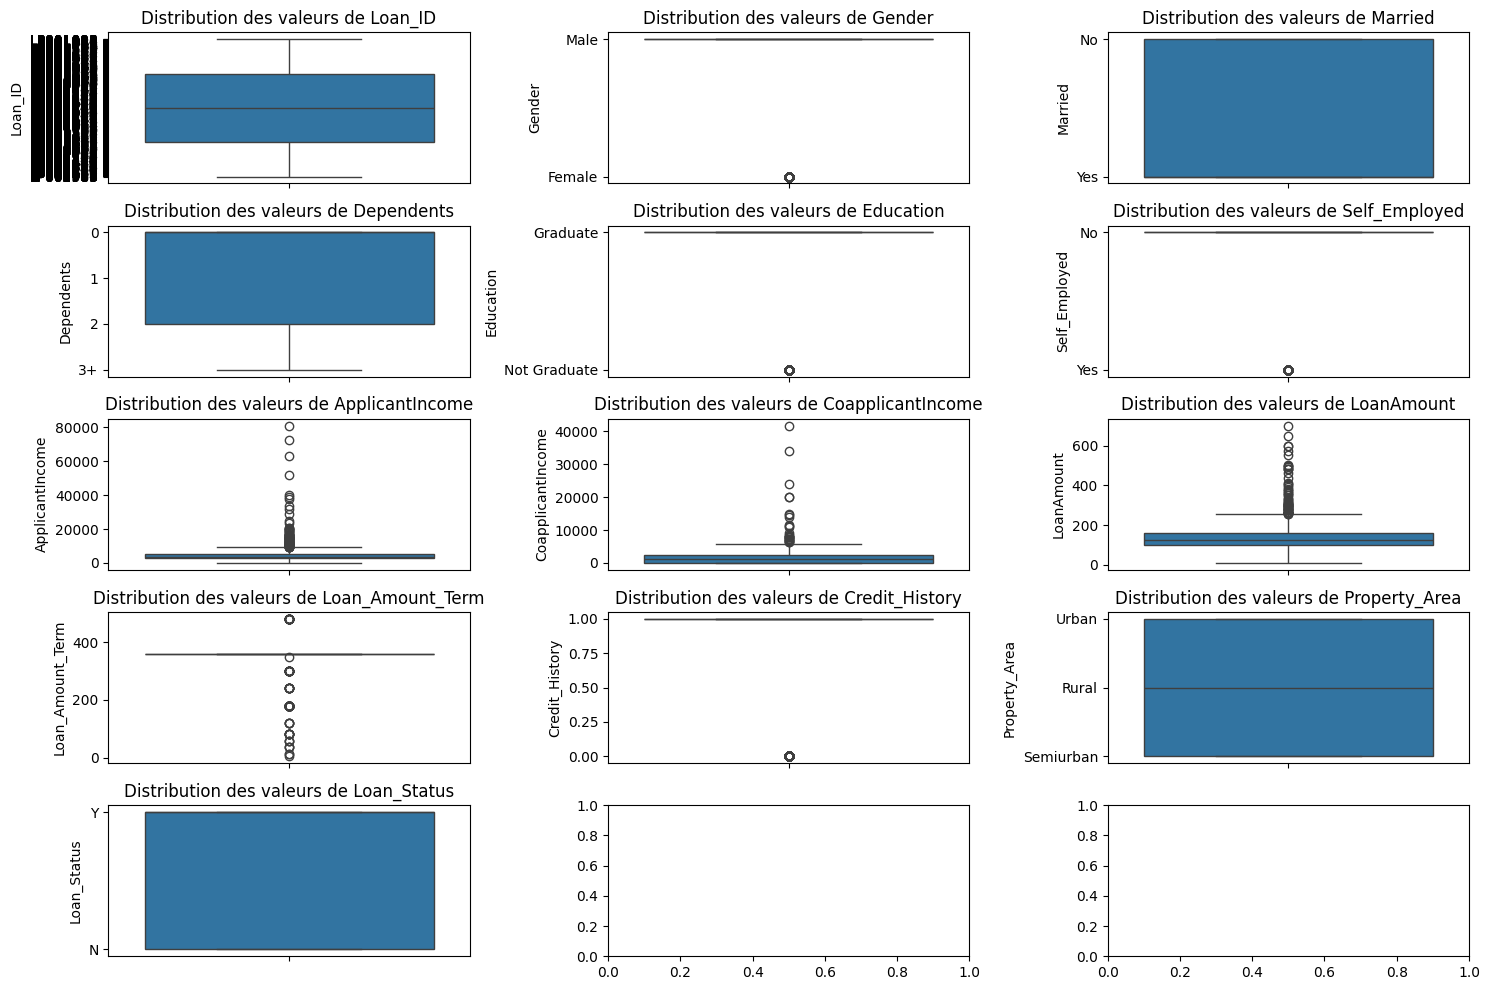

In [3027]:
distrib_boxplot(df_loan, 5)

Notes :
- Credit_History étant une variable binaire, un boxplot n'aurait que peu d'intérêt.
- Pour toutes les autres variables, il semble y avoir beaucoup d'ouliers, dont des valeurs parfois extrêmes.

## 2. Preprocessing

### Gestion des NaN

Variables ayant des NaN:
- Gender : peu de NaN, remplissage par le mode (car le jeu de données est petit, on ne peut donc se permettre de supprimer trop de lignes).
- Married : peu de NaN, remplissage par le mode (car le jeu de données est petit, on ne peut donc se permettre de supprimer trop de lignes).
- Dependents : peu de NaN, remplissage par le mode (car le jeu de données est petit, on ne peut donc se permettre de supprimer trop de lignes).
- Self_Employed : peu de NaN, remplissage par le mode (car le jeu de données est petit, on ne peut donc se permettre de supprimer trop de lignes).
- Loan_Amount : peu de NaN, mais beaucoup d'outliers, donc remplissage par la médiane.
- Loan_Amount_Term : peu de NaN, mais beaucoup d'outliers, donc remplissage par la médiane.
- Credit_History : environ 10% de NaN, mais variable binaire, malgré le fait qu'elle soit de type float. Elle n'a que très peu de corrélation avec les autres variables. Proposition de traitement : encodage en valeurs qualitatives, puis remplissage par le mode.
- Loan_Status : beaucoup de NaN, mais bien en-dessous de 70%. Il s'agit de la colonne cible, donc il vaut mieux supprimer les lignes en question, au risque de biaiser le modèle en remplissant par le mode.

In [3028]:
# Remplissages des NaN
df_loan['Gender'] = df_loan['Gender'].fillna(df_loan['Gender'].mode())
df_loan['Married'] = df_loan['Married'].fillna(df_loan['Married'].mode())
df_loan['Dependents'] = df_loan['Dependents'].fillna(df_loan['Dependents'].mode())
df_loan['Self_Employed'] = df_loan['Self_Employed'].fillna('No')
df_loan['LoanAmount'] = df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].median())
df_loan['Loan_Amount_Term'] = df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].median())
df_loan['Credit_History'] = df_loan['Credit_History'].fillna(0)

In [3140]:
# Vérification des NaN
display(df_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    float64
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Loan_Status        614 non-null    object 
dtypes: float64(5), object(6)
memory usage: 84.4+ KB


None

### Traitement des outliers

In [3030]:
# Traitement outliers ApplicantIncome
Q1_ai = df_loan['ApplicantIncome'].quantile(0.25)
Q3_ai = df_loan['ApplicantIncome'].quantile(0.75)
IQR_ai = Q3_ai - Q1_ai
borne_inf_ai = Q1_ai - 1.5 * IQR_ai
borne_sup_ai = Q3_ai + 1.5 * IQR_ai

df_loan['ApplicantIncome'] = df_loan['ApplicantIncome'].apply(
    lambda x: np.log(x) if x < borne_inf_ai or x > borne_sup_ai else x
)

In [3031]:
# Traitement outliers CoapplicantIncome
Q1_ci = df_loan['CoapplicantIncome'].quantile(0.25)
Q3_ci = df_loan['CoapplicantIncome'].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
borne_inf_ci = Q1_ci - 1.5 * IQR_ci
borne_sup_ci = Q3_ci + 1.5 * IQR_ci

df_loan['CoapplicantIncome'] = df_loan['CoapplicantIncome'].apply(
    lambda x: np.log(x) if x < borne_inf_ci or x > borne_sup_ci else x
)

In [3032]:
# Traitement outliers LoanAmount
Q1_la = df_loan['LoanAmount'].quantile(0.25)
Q3_la = df_loan['LoanAmount'].quantile(0.75)
IQR_la = Q3_la - Q1_la
borne_inf_la = Q1_la - 1.5 * IQR_la
borne_sup_la = Q3_la + 1.5 * IQR_la

df_loan['LoanAmount'] = df_loan['LoanAmount'].apply(
    lambda x: np.log(x) if x < borne_inf_la or x > borne_sup_la else x
)

In [3033]:
# Traitement outliers Loan_Amount_Term
Q1_lat = df_loan['Loan_Amount_Term'].quantile(0.25)
Q3_lat = df_loan['Loan_Amount_Term'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
borne_inf_lat = Q1_lat - 1.5 * IQR_lat
borne_sup_lat = Q3_lat + 1.5 * IQR_lat

df_loan['Loan_Amount_Term'] = df_loan['Loan_Amount_Term'].apply(
    lambda x: np.log(x) if x < borne_inf_lat or x > borne_sup_lat else x
)

### Vérification des outliers

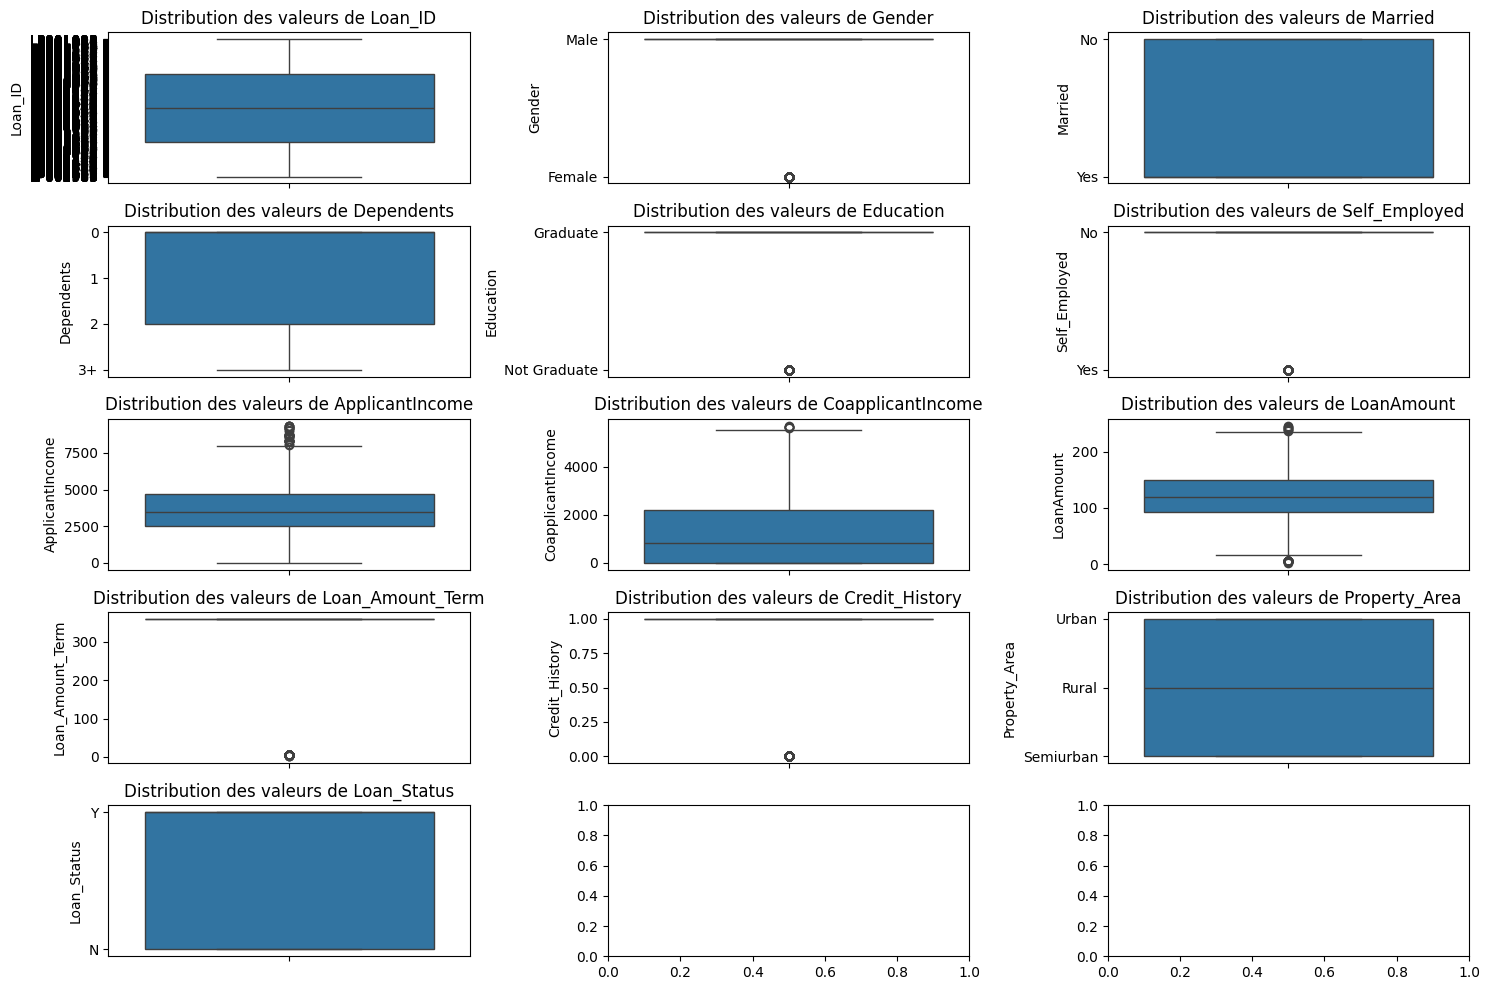

In [3034]:
distrib_boxplot(df_loan, 5)

Le traitement n'ayant pas fonctionné comme souhaité pour Loan_Amount_Term, un remplacement par la médiane est préférable

In [3035]:
# Traitement outliers Loan_Amount_Term
Q1_lat = df_loan['Loan_Amount_Term'].quantile(0.25)
Q3_lat = df_loan['Loan_Amount_Term'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
borne_inf_lat = Q1_lat - 1.5 * IQR_lat
borne_sup_lat = Q3_lat + 1.5 * IQR_lat

median = df_loan['Loan_Amount_Term'].median()

df_loan['Loan_Amount_Term'] = df_loan['Loan_Amount_Term'].apply(
    lambda x: median if x < borne_inf_lat or x > borne_sup_lat else x
)

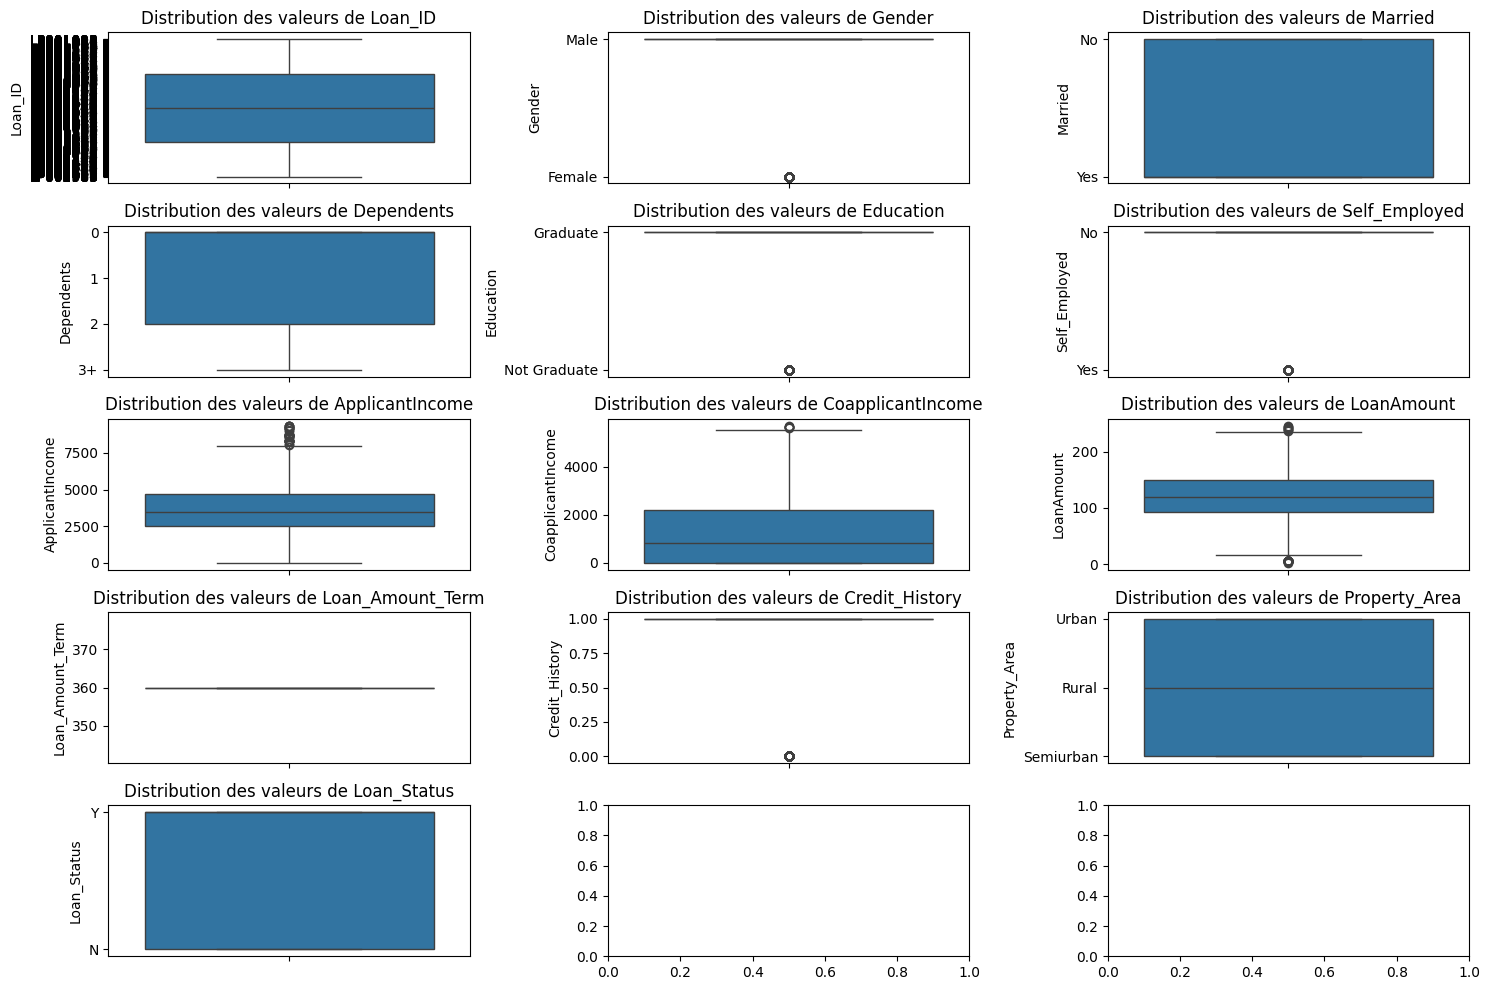

In [3036]:
distrib_boxplot(df_loan, 5)

### Séparation des données d'entraînement et des données de test

Etant donné que la colonne cible Loan_Status contient beaucoup de NaN, on peut diviser le dataset en deux, avec une partie contenant uniquement les lignes où Loan_Status contient une valeur pour l'entraînement et une autre partie contenant uniquement les lignes où Loan_Status contient des NaN pour le test.

### Suppression des variables inutiles

In [3037]:
df_loan_encoded = df_loan

# La seule variable inutile dans le dataset est Loan_ID
df_loan_encoded.drop(columns='Loan_ID', inplace=True)

### Encodage des variables catégorielles

In [3039]:
def binary_encoder(colonne, choix_true, choix_false):
    for i in range(len(df_loan_encoded[colonne])):
        if df_loan_encoded[colonne][i] == choix_true:
            df_loan_encoded[colonne][i] = 1
        elif df_loan_encoded[colonne][i] == choix_false:
            df_loan_encoded[colonne][i] = 0

In [3040]:
# Encodage binaire sur toutes les variables binaires
binary_encoder(colonne='Gender', choix_true='Male', choix_false='Female')
binary_encoder(colonne='Married', choix_true='Yes', choix_false='No')
binary_encoder(colonne='Education', choix_true='Graduate', choix_false='Not Graduate')
binary_encoder(colonne='Self_Employed', choix_true='Yes', choix_false='No')
binary_encoder(colonne='Loan_Status', choix_true='Y', choix_false='N')

C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\1780693671.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_loan_encoded[colonne][i] = 1
C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\1780693671.py:4: SettingWithCopyWarning: 
A va

In [3042]:
# Encodage One-Hot sur la variable Property_Area, qui n'est pas binaire
from sklearn.calibration import LabelEncoder

encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(df_loan_encoded[['Property_Area']]).toarray()
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Property_Area']))

# Remplacement de la variable par le nouveau DataFrame encodé dans la DataFrame original
df_loan_encoded.drop(columns=['Property_Area'], inplace=True)
df_loan_encoded = pd.concat([df_loan_encoded, df_encoded], axis=1)

# Encodage One-Hot sur la variable Dependents, qui n'est pas binaire
encoder = LabelEncoder()
df_loan_encoded['Dependents'] = encoder.fit_transform(df_loan_encoded[['Dependents']])

c:\Users\tiger\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3043]:
# Suppression des lignes où Loan_Status = NaN
df_loan_encoded.dropna(subset=['Loan_Status'], inplace=True)

# La ligne qui suit a pour but de convertir Loan_Status du type object au type int64 (c'est le seul moyen que j'ai trouvé pour convertir qui fonctionne)
df_loan_encoded['Loan_Status'] = df_loan_encoded['Loan_Status'].fillna(df_loan_encoded['Loan_Status'].median())

C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\572435458.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_loan_encoded['Loan_Status'] = df_loan_encoded['Loan_Status'].fillna(df_loan_encoded['Loan_Status'].median())


In [3044]:
# Séparation des données
X = df_loan_encoded.drop('Loan_Status', axis=1)
y = df_loan_encoded['Loan_Status']

In [3045]:
display(X.head())
display(X.info())

Gender Married  Dependents Education Self_Employed  ApplicantIncome  \
0      1       0           0         1             0           5849.0   
1      1       1           1         1             0           4583.0   
2      1       1           0         1             1           3000.0   
3      1       1           0         0             0           2583.0   
4      1       0           0         1             0           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       126.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  
0                  0.0                      0.0                  1.0  
1                  1.0                      0.0                  0.0  
2                  0.0                      0.0                  1.0  
3                  0.0                      0.0                  1.0  
4                  0.0                      0.0                  1.0

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   601 non-null    object 
 1   Married                  611 non-null    object 
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    object 
 4   Self_Employed            614 non-null    object 
 5   ApplicantIncome          614 non-null    float64
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Property_Area_Rural      614 non-null    float64
 11  Property_Area_Semiurban  614 non-null    float64
 12  Property_Area_Urban      614 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 67.2+ KB


None

In [3046]:
display(y.head())
display(y.info())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

<class 'pandas.core.series.Series'>
Index: 614 entries, 0 to 613
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


None

### Derniers remplissages de NaN

In [3047]:
X['Gender'] = X['Gender'].fillna(X['Gender'].median())
X['Married'] = X['Married'].fillna(X['Married'].median())
X['Self_Employed'] = X['Self_Employed'].fillna(X['Self_Employed'].median())
X['Education'] = X['Education'].fillna(X['Education'].median())

C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\1332636923.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Gender'] = X['Gender'].fillna(X['Gender'].median())
C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\1332636923.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Married'] = X['Married'].fillna(X['Married'].median())
C:\Users\tiger\AppData\Local\Temp\ipykernel_12616\1332636923.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(cop

In [3141]:
display(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    float64
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Property_Area_Rural      614 non-null    float64
 11  Property_Area_Semiurban  614 non-null    float64
 12  Property_Area_Urban      614 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 67.2 KB


None

In [3049]:
display(y.head())
display(y.info())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

<class 'pandas.core.series.Series'>
Index: 614 entries, 0 to 613
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 9.6 KB


None

In [3050]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

Au vu des différences conséquentes dans les tailles des valeurs, ainsi que dans les moyennes, il est préférable d'utiliser le MinMaxScaler.

In [3056]:
from sklearn.preprocessing import MinMaxScaler

scaler_X_train = MinMaxScaler()
scaler_X_train.fit(X_train)

scaler_X = MinMaxScaler()
scaler_X.fit(X_test)

MinMaxScaler()

## 3. Entraînement des modèles

In [3057]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

### Optimisation des hyperparamètres

In [3069]:
# GridSearchCV
def grid_search_cv(model, param_grid):
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=precision_scorer,
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print("Meilleurs paramètres:", grid_search.best_params_)
    print("Meilleure Cross-Validation Precision:", grid_search.best_score_)

In [3070]:
# RandomizeSearchCV
def randomized_search_cv(model, param_dist):
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        scoring=precision_scorer,
        n_iter=10,
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    print("Meilleurs paramètres:", random_search.best_params_)
    print("Meilleure Cross-Validation Precision:", random_search.best_score_)

### Cross-Validation

In [3071]:
# k-fold cross-validation à 5 folds
def kfold_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=precision_scorer)
    print(f"k-fold cross-validation score: {scores.mean()}")

In [3072]:
# LOOCV à 5 folds
def loocv(model):
    loo = LeaveOneOut()
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    scores = cross_val_score(model, X_train, y_train, cv=loo, scoring=precision_scorer)
    print(f"k-fold cross-validation score: {scores.mean()}")

In [3073]:
# Stratified k-fold cross-validation à 5 folds
def s_kf_cv(model):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=precision_scorer)
    print(f"k-fold cross-validation score: {scores.mean()}")

### Simple Validation

In [3074]:
def performances_model(model):
    '''
    Affichage des performances du modèle passé en paramètre

    Parameters:
        model: le modèle de ML entraîné à tester
    '''
    y_pred = model.predict(X_test)
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n{classification_report(y_test, y_pred, zero_division=0)}")

### Paramètres

In [3064]:
# Dictionnaire de paramètres pour les grid search et randomized search

param = {
    'knn': {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'logistic_regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.5, 1.0, 1.5, 3, 5, 10],
        'solver': ['liblinear']
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'gamma': [0.01, 0.1, 1, 10]
    },
    'decision_tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'random_forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'gradient_boosting': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    },
    'hist_gradient_boosting': {
        'max_iter': [100, 200, 500, 1000],
        'max_depth': [3, 5, 10, None],
        'min_samples_leaf': [10, 20, 50, 100, 200]
    }
}

### KNN

In [3075]:
'''
Paramètres clés de KNeighborsClassifier :
    - n_neighbors: utiliser des nombres impaires pour éviter les égalités (3, 5, 7, ...)
    - weights:
        - uniform: tous les voisins contribuent de manière égale
        - distance: les voisins les plus proches contribuent plus que les plus éloignés
    - metrics:
        - euclidean: distance standard en ligne droite
        - manhattan: some des différences absolues (bien pour les données sous forme de grilles)
        - minkowski: métrique de distance généralisée où l'on peut spécifier la p-norm
'''

def knn_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles KNN pour déterminer
    les meilleurs hyperparamètres
    '''
    model = KNeighborsClassifier()
    grid_search_cv(model, param['knn'])
    randomized_search_cv(model, param['knn'])

def knn_cross_validation(n_neighbors, weights, metric):
    '''
    Effectue des cross validation sur des modèles KNN
    '''
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def knn(n_neighbors, weights, metric):
    '''
    Entraînement d'un modèle KNN
    '''
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
    model.fit(X_train, y_train)
    return model

In [3077]:
# Grid Search et Randomized Search sur KNN
knn_search_cv()

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}
Meilleure Cross-Validation Precision: 0.7287292647406052
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'weights': 'uniform', 'n_neighbors': 21, 'metric': 'euclidean'}
Meilleure Cross-Validation Precision: 0.7287292647406052


In [3079]:
# Cross validations sur KNN
knn_cross_validation(n_neighbors=21, metric='euclidean', weights='uniform')

k-fold cross-validation score: 0.6827173805785939
k-fold cross-validation score: 0.6843177189409368
k-fold cross-validation score: 0.7008890014827065


In [3080]:
# Validation simple sur KNN
performances_model(knn(n_neighbors=21, metric='euclidean', weights='uniform'))

Confusion matrix: 
[[ 5 38]
 [ 6 74]]
Classification report: 
              precision    recall  f1-score   support

           0       0.45      0.12      0.19        43
           1       0.66      0.93      0.77        80

    accuracy                           0.64       123
   macro avg       0.56      0.52      0.48       123
weighted avg       0.59      0.64      0.57       123



### Regression Logistique

In [3081]:
'''
Paramètres clés de LogisticRegression :
    - penalty : l1, l2(default), elasticnet
    - C : 0.5, 1.0(default), 1.5, 3, 5, 10
    - solver :
        - liblinear : petits datasets, supporte penalty l1 et l2
        - saga : grands datasets, supporte tous les penalty
        - lbfgs : plus rapide sur les grands datasets, supporte uniquement l2
        - newton-cg : similaire à lbfgs
        - sag : rapide sur les grands dataset, supporte l2 uniquement
'''

def logistic_regression_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles de régression logistique
    pour déterminer les meilleurs hyperparamètres
    '''
    model = LogisticRegression()
    grid_search_cv(model, param['logistic_regression'])
    randomized_search_cv(model, param['logistic_regression'])

def logistic_regression_cross_validation(penalty, C, solver):
    '''
    Effectue des cross validation sur des modèles de régression logistique
    '''
    model = LogisticRegression(penalty=penalty, C=C, solver=solver)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def logistic_regression(penalty, C, solver):
    '''
    Entraînement d'un modèle de régression logistique
    '''
    model = LogisticRegression(penalty=penalty, C=C, solver=solver)
    model.fit(X_train, y_train)
    return model

In [3082]:
# Grid Search et Randomized Search sur la régression logistique
logistic_regression_search_cv()

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleurs paramètres: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Meilleure Cross-Validation Precision: 0.7434322560192909
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
Meilleure Cross-Validation Precision: 0.7434322560192909


In [3083]:
# Cross validations sur la régression logistique
logistic_regression_cross_validation(penalty='l1', C=1, solver='liblinear')

k-fold cross-validation score: 0.759863808975278
k-fold cross-validation score: 0.7617107942973523
k-fold cross-validation score: 0.7471744345992466


In [3084]:
# Validation simple sur la régression logistique
performances_model(logistic_regression(penalty='l2', C=3, solver='liblinear'))

Confusion matrix: 
[[19 24]
 [ 7 73]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



### SVM

In [3085]:
'''
Paramètres clés de SVC :
    - C : [0.01, 0.1, 1, 10, 100]
    - kernel :
        - linear : bien pour les données linéairement séparables
        - rbf : choix populaire pour la plupart des datasets (kernel non-linéaire)
        - poly : kernel polynomial (nécessite de gérer le paramètre degree)
        - sigmoid : bien pour les données qui peuvent être séparées de manière non-linéaires, sans
        pour autant qu'elles suivent des patterns radiaux ou polynomiaux
    - gamma : un gamma élevé peut entraîner de l'overfitting, tandis qu'un gamma bas peut entraîner
    de l'underfitting ([0.001, 0.01, 0.1, 1, 10, 100])
'''

def svm_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles SVM
    pour déterminer les meilleurs hyperparamètres
    '''
    model = SVC()
    grid_search_cv(model, param['svm'])
    randomized_search_cv(model, param['svm'])

def svm_cross_validation(C, kernel, gamma):
    '''
    Effectue des cross validation sur des modèles SVM
    '''
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def svm(C, kernel, gamma):
    '''
    Entraînement d'un modèle SVM
    '''
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train, y_train)
    return model

In [ ]:
# Grid Search et Randomized Search sur SVM
# ATTENTION : le processus est long (environ 50 minutes) !
svm_search_cv()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [3088]:
# Cross validations sur SVM
svm_cross_validation(C=0.1, kernel='rbf', gamma=0.01)

k-fold cross-validation score: 0.48684807256235824
k-fold cross-validation score: 0.6965376782077393
k-fold cross-validation score: 0.48517917427273377


In [3089]:
# Validation simple sur SVM
performances_model(svm(C=0.1, kernel='rbf', gamma=0.01))

Confusion matrix: 
[[ 0 43]
 [ 0 80]]
Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



### Decision Tree

In [3093]:
'''
Paramètres clés de Decision Tree :
    - max_depth : limite de profondeur de l'arbre où des valeurs basses réduisent l'overfitting
    mais peut entraîner de l'underfitting ([3, 5, 10, None])
    - min_samples_split : de plus grandes valeurs nécessitent plus de données pour créer des
    splits, réduisant l'overfitting ([2, 5, 10])
    - criterion :
        - gini : simple et rapide
        - entropy : pour une meilleure interprétabilité
'''

def decision_tree_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles Decision Tree
    pour déterminer les meilleurs hyperparamètres
    '''
    model = DecisionTreeClassifier()
    grid_search_cv(model, param['decision_tree'])
    randomized_search_cv(model, param['decision_tree'])

def decision_tree_cross_validation(max_depth, min_samples_split, criterion):
    '''
    Effectue des cross validation sur des modèles Decision Tree
    '''
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def decision_tree(max_depth, min_samples_split, criterion):
    '''
    Entraînement d'un modèle Decision Tree
    '''
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)
    model.fit(X_train, y_train)
    return model

In [3094]:
# Grid Search et Randomized Search sur Decision Tree
decision_tree_search_cv()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Meilleure Cross-Validation Precision: 0.7572149644992356
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'min_samples_split': 5, 'max_depth': 3, 'criterion': 'entropy'}
Meilleure Cross-Validation Precision: 0.7572149644992356


In [3095]:
# Cross validations sur Decision Tree
decision_tree_cross_validation(max_depth=3, min_samples_split=2, criterion='entropy')

k-fold cross-validation score: 0.7534496998415442
k-fold cross-validation score: 0.7678207739307535
k-fold cross-validation score: 0.7489114481151864


In [3097]:
# Validation simple sur Decision Tree
performances_model(decision_tree(max_depth=3, min_samples_split=2, criterion='entropy'))

Confusion matrix: 
[[22 21]
 [ 7 73]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.51      0.61        43
           1       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123



### Random Forest

In [3098]:
'''
Paramètres clés de Random Forest :
    - n_estimators : [10, 50, 100, 200] pour de très grands dataset, il est possible de monter jusqu'à 500
    - max_depth : limite de profondeur de l'arbre où des valeurs basses réduisent l'overfitting
    mais peut entraîner de l'underfitting ([3, 5, 10, None])
    - min_samples_split : de plus grandes valeurs nécessitent plus de données pour créer des
    splits, réduisant l'overfitting ([2, 5, 10])
'''

def random_forest_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles Random Forest
    pour déterminer les meilleurs hyperparamètres
    '''
    model = RandomForestClassifier()
    grid_search_cv(model, param['random_forest'])
    randomized_search_cv(model, param['random_forest'])

def random_forest_cross_validation(n_estimators, max_depth, min_samples_split):
    '''
    Effectue des cross validation sur des modèles Random Forest
    '''
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def random_forest(n_estimators, max_depth, min_samples_split):
    '''
    Entraînement d'un modèle Random Forest
    '''
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    return model

In [3099]:
# Grid Search et Randomized Search sur Random Forest
random_forest_search_cv()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}
Meilleure Cross-Validation Precision: 0.7616449595365795
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': None}
Meilleure Cross-Validation Precision: 0.7385069284946197


In [3100]:
# Cross validations sur Random Forest
random_forest_cross_validation(n_estimators=10, max_depth=3, min_samples_split=2)

k-fold cross-validation score: 0.7145289980643315
k-fold cross-validation score: 0.7209775967413442
k-fold cross-validation score: 0.6806724300701206


In [3102]:
# Validation simple sur Random Forest
performances_model(random_forest(n_estimators=10, max_depth=3, min_samples_split=2))

Confusion matrix: 
[[18 25]
 [ 7 73]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



### Gradient Boosting

In [3103]:
'''
Paramètres clés de Gradient Boosting :
    - n_estimators : [10, 50, 100, 200] pour de très grands dataset, il est possible de monter jusqu'à 500
    - max_depth : limite de profondeur de l'arbre où des valeurs basses réduisent l'overfitting
    mais peut entraîner de l'underfitting ([3, 5, 10, None])
    - min_samples_split : de plus grandes valeurs nécessitent plus de données pour créer des
    splits, réduisant l'overfitting ([2, 5, 10])
'''

def gradient_boosting_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles Gradient Boosting
    pour déterminer les meilleurs hyperparamètres
    '''
    model = GradientBoostingClassifier()
    grid_search_cv(model, param['gradient_boosting'])
    randomized_search_cv(model, param['gradient_boosting'])

def gradient_boosting_cross_validation(n_estimators, max_depth, min_samples_split):
    '''
    Effectue des cross validation sur des modèles Gradient Boosting
    '''
    model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def gradient_boosting(n_estimators, max_depth, min_samples_split):
    '''
    Entraînement d'un modèle Gradient Boosting
    '''
    model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    return model

In [3104]:
# Grid Search et Randomized Search sur Gradient Boosting
gradient_boosting_search_cv()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Meilleure Cross-Validation Precision: 0.7324901040852818
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 10}
Meilleure Cross-Validation Precision: 0.7214501657311386


In [3105]:
# Cross validations sur Gradient Boosting
gradient_boosting_cross_validation(n_estimators=200, max_depth=10, min_samples_split=2)

k-fold cross-validation score: 0.731836378201241
k-fold cross-validation score: 0.714867617107943
k-fold cross-validation score: 0.7174112224583926


In [3107]:
# Validation simple sur Gradient Boosting
performances_model(gradient_boosting(n_estimators=200, max_depth=10, min_samples_split=2))

Confusion matrix: 
[[19 24]
 [15 65]]
Classification report: 
              precision    recall  f1-score   support

           0       0.56      0.44      0.49        43
           1       0.73      0.81      0.77        80

    accuracy                           0.68       123
   macro avg       0.64      0.63      0.63       123
weighted avg       0.67      0.68      0.67       123



### Hist Gradient Boosting

In [3109]:
'''
Paramètres clés de Hist Gradient Boosting :
    - max_iter :  [100, 200, 500, 1000] pour de très grands dataset, il est possible de monter jusqu'à 500
    - max_depth : limite de profondeur de l'arbre où des valeurs basses réduisent l'overfitting
    mais peut entraîner de l'underfitting ([3, 5, 10, None])
    - min_samples_leaf : valeurs plus élevées réduisent l'overfitting ([10, 20, 50, 100, 200])
'''

def hist_gradient_boosting_search_cv():
    '''
    Effectue des grid search et des randomized search sur des modèles Hist Gradient Boosting
    pour déterminer les meilleurs hyperparamètres
    '''
    model = HistGradientBoostingClassifier()
    grid_search_cv(model, param['hist_gradient_boosting'])
    randomized_search_cv(model, param['hist_gradient_boosting'])

def hist_gradient_boosting_cross_validation(max_iter, max_depth, min_samples_leaf):
    '''
    Effectue des cross validation sur des modèles Hist Gradient Boosting
    '''
    model = HistGradientBoostingClassifier(max_iter=max_iter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    kfold_cv(model)
    loocv(model)
    s_kf_cv(model)

def hist_gradient_boosting(max_iter, max_depth, min_samples_leaf):
    '''
    Entraînement d'un modèle Hist Gradient Boosting
    '''
    model = HistGradientBoostingClassifier(max_iter=max_iter, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    return model

In [3110]:
# Grid Search et Randomized Search sur Hist Gradient Boosting
hist_gradient_boosting_search_cv()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Meilleurs paramètres: {'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 50}
Meilleure Cross-Validation Precision: 0.7275244867411422
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'min_samples_leaf': 50, 'max_iter': 100, 'max_depth': 10}
Meilleure Cross-Validation Precision: 0.7271542450984945


In [3111]:
# Cross validations sur Hist Gradient Boosting
hist_gradient_boosting_cross_validation(max_iter=100, max_depth=3, min_samples_leaf=50)

k-fold cross-validation score: 0.7251157834356791
k-fold cross-validation score: 0.745417515274949
k-fold cross-validation score: 0.7349903119203793


In [3112]:
# Validation simple sur Hist Gradient Boosting
performances_model(hist_gradient_boosting(max_iter=100, max_depth=3, min_samples_leaf=50))

Confusion matrix: 
[[19 24]
 [ 5 75]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



## 4. Interprétation des résultats

La caractéristique la plus importante dans ce contexte est la précision, car il faut absolument éviter les faux positifs, au risque de faire perdre de l'argent à la banque.

De tous les modèles testés, voici les deux plus performants, avec une précision à 77% :
- Régression logistique
- Decision Tree

Le Decision Tree ayant obtenu des résultats un peu plus satisfaisants au niveau de la matrice de confusion (22 TP / 21 FP contre 19 TP / 24 FP pour la régression logistique). C'est donc le modèle qui sera retenu.

Malgré tout, les résultats visibles dans la matrice de confusion ne sont pas des plus satisfaisants, car la moitié des prédiction positives sont fausses. Ceci-dit, les vrai négatifs semblent être bien détecté, avec 7 FN / 73 TN.

Après plusieurs essais sur la colonne Loan_Status (remplacement des NaN par 1, remplacement des NaN par 0, suppression des NaN), c'est finalement avec la suppression que le modèle s'est retrouvé le plus performant. Cependant, la perte d'un nombre conséquent de données aura eu un impact négatif sur l'entraînement du modèle.

## 5. Sauvegarde et utilisation du modèle retenu

### Sauvegarde du modèle

In [3113]:
import joblib

model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, criterion='entropy')
model.fit(X_train, y_train)

joblib.dump(model, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

### Chargement et utilisation du modèle

In [3142]:
# Chargement du modèle
loaded_model = joblib.load('decision_tree_model.joblib')

In [3143]:
# Nouvelle ligne de données à tester
data = {
    'Gender': ['Male'],
    'Married': ['Yes'],
    'Dependents': ['3+'],
    'Education': ['Not Graduate'],
    'Self_Employed': ['Yes'],
    'ApplicantIncome': [3500],
    'CoapplicantIncome': [1750],
    'LoanAmount': [275],
    'Loan_Amount_Term': [360],
    'Credit_History': [0],
    'Property_Area': ['Urban']
}

In [3144]:
# Conversion du dictionnaire en DataFrame
df = pd.DataFrame(data)

In [3145]:
# Encode et mise à l'échelle des nouvelles données
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for column in df.columns:
    match column:
        case 'Gender':
            df[column] = df[column].map({'Male': 1, 'Female': 0})
        case 'Married':
            df[column] = df[column].map({'Yes': 1, 'No': 0})
        case 'Education':
            df[column] = df[column].map({'Graduate': 1, 'Not Graduate': 0})
        case 'Self_Employed':
            df[column] = df[column].map({'Yes': 1, 'No': 0})
        case 'Dependents':
            encoder = LabelEncoder()
            df[column] = encoder.fit_transform(df[[column]])
        case 'Property_Area':
            df['Property_Area_Rural'] = 0
            df['Property_Area_Semiurban'] = 0
            df['Property_Area_Urban'] = 0

if df['Property_Area'][0] == 'Rural':
    df['Property_Area_Rural'][0] = 1
elif df['Property_Area'][0] == 'Semiurban':
    df['Property_Area_Semiurban'][0] = 1
elif df['Property_Area_Urban'][0] == 'Urban':
    df['Property_Area_Urban'][0] = 1

df.drop(labels='Property_Area', axis=1, inplace=True)

scaler = MinMaxScaler()
scaler.fit(df)

c:\Users\tiger\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MinMaxScaler()

In [3146]:
# Prédiction
y_pred = loaded_model.predict(df)

if y_pred == 1:
    y_pred = "Y"
else:
    y_pred = "N"

print(f"Prédiction : {y_pred}")

Prédiction : N


En changeant le paramètre le plus influent sur la prédiction (Credit_History), on peut voir que le résultat de prédiction change également.